In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='skill_count', ylabel='skill_pay'>

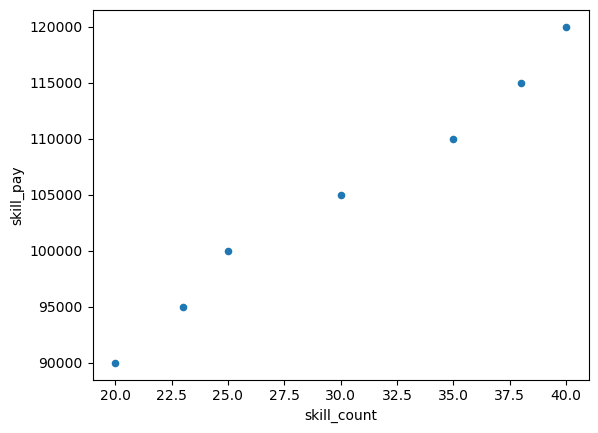

In [2]:
data = {
  'job_skills': ['python', 'sql', 'excel', 'r', 'tableau', 'excel', 'power bi'],
  'skill_count': [40, 38, 35, 30, 25, 23, 20],
  'skill_pay': [120000, 115000, 110000, 105000, 100000, 95000, 90000]
}

df_temp = pd.DataFrame(data)

df_temp.plot(kind='scatter', x='skill_count', y='skill_pay')

In [73]:
the_title = 'Data Analyst'

df_DA = df[df.job_title_short == the_title].copy()
df_DA_exploded = df_DA.explode('job_skills')


In [74]:
df_DA_exploded.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
726299,Data Analyst,Data Analyst H/F (CDI),"Nanterre, France",via Jobijoba,Full-time,False,France,2023-09-14 21:21:36,False,False,France,None,NaN,NaN,Elis,sql,"{'analyst_tools': ['excel'], 'cloud': ['oracle..."
297693,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-27 17:37:02,False,False,United Kingdom,None,NaN,NaN,Howells Solutions Ltd,excel,"{'analyst_tools': ['sas', 'power bi', 'excel',..."


In [98]:
df_DA_exploded['job_skills'].value_counts().head(10)

job_skills
sql           92428
excel         66860
python        57190
tableau       46455
power bi      39380
r             29996
sas           27998
powerpoint    13822
word          13562
sap           11280
Name: count, dtype: int64

# contoh menggunakan groupBy

In [114]:
# df_DA_scatter = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size']).sort_values(by='size', ascending=False).head(10)
skill_stats = df_DA_exploded.groupby('job_skills').agg(
  skill_count=('job_skills', 'count'),
  median_salary=('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10)

In [116]:
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


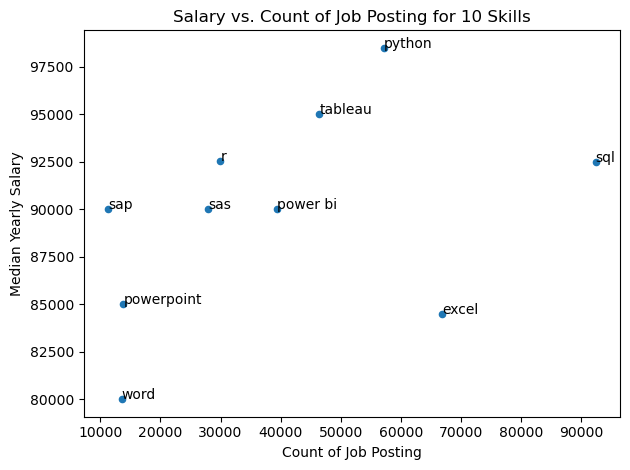

In [120]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel("Count of Job Posting")
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Posting for 10 Skills')

for i, txt in enumerate(skill_stats.index):
  # print(i, txt)
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

<Axes: xlabel='size', ylabel='median'>

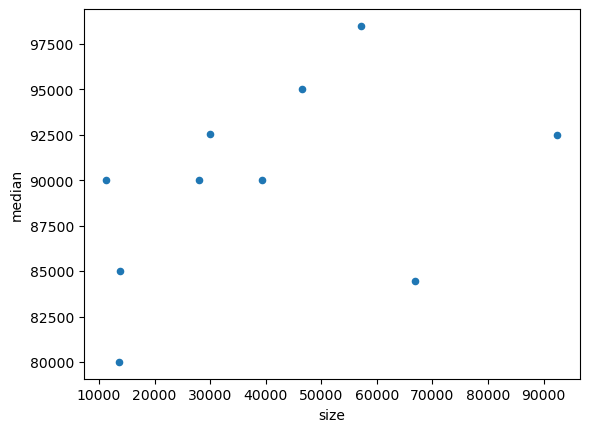

In [ ]:
df_DA_scatter.plot(kind='scatter', x='size', y='median')